<a href="https://colab.research.google.com/github/poojamahajan0712/medium_blog/blob/master/Fully_connected_NNvsCNN/MNIST_Keras_Fully_Connected_vs_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, Activation,MaxPool2D 

Loading dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Shape of the data 

In [ ]:
print('Training data ',X_train.shape,'-',y_train.shape)
print('Test data ',X_test.shape,'-',y_test.shape)

Training data  (60000, 28, 28) - (60000,)
Test data  (10000, 28, 28) - (10000,)


Viewing MNIST data

(-0.5, 27.5, 27.5, -0.5)

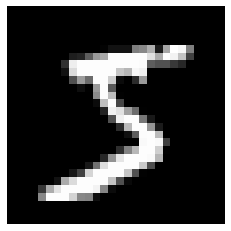

In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.axis('off')

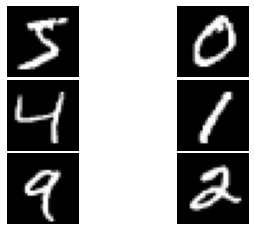

In [ ]:
## Viewing more from training dataset
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.subplots_adjust(hspace = .03,wspace=0.025)
  plt.axis('off')

In [ ]:
#Reshape data into a long vector 
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
## Scaling data 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Categorical encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
#Let's see what happened to categorical variable 
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Model1 - Fully Connected Network

In [ ]:
## Fully Connected Architecture 

model = Sequential()
model.add(Dense(256, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


## Printing model summary 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 304,106
Trainable params: 304,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting fully connected model with validation_split as 0.3
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 3s 10ms/step - loss: 0.3534 - accuracy: 0.8920 - val_loss: 0.3728 - val_accuracy: 0.8866
Epoch 2/5
329/329 [==============================] - 3s 10ms/step - loss: 0.1257 - accuracy: 0.9609 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 3/5
329/329 [==============================] - 3s 10ms/step - loss: 0.0799 - accuracy: 0.9764 - val_loss: 0.1069 - val_accuracy: 0.9684
Epoch 4/5
329/329 [==============================] - 3s 10ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.1002 - val_accuracy: 0.9734
Epoch 5/5
329/329 [==============================] - 3s 10ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.1534 - val_accuracy: 0.9607


Text(0.5, 0, 'Epochs')

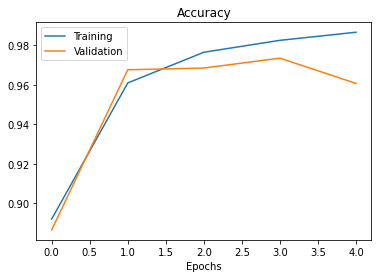

In [ ]:
## Visualising Training and Validation Accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
print("Test Accuracy",np.round((test_accuracy)*100,2))

313/313 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9618
Test Accuracy 96.18


Model 2 - Convolutional Network 

In [ ]:
## Reshaping independent variable for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# CNN architecture
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3),activation='relu'))
model2.add(Conv2D(32, (3, 3),activation='relu'))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                82976     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
h1=model2.fit(X_train, y_train_cat, batch_size=128,epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 34s 103ms/step - loss: 0.2744 - accuracy: 0.9151 - val_loss: 0.1128 - val_accuracy: 0.9671
Epoch 2/5
329/329 [==============================] - 34s 102ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0958 - val_accuracy: 0.9706
Epoch 3/5
329/329 [==============================] - 33s 102ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0701 - val_accuracy: 0.9783
Epoch 4/5
329/329 [==============================] - 33s 102ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0540 - val_accuracy: 0.9851
Epoch 5/5
329/329 [==============================] - 34s 102ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0457 - val_accuracy: 0.9863


In [ ]:
model2.evaluate(X_test, y_test_cat)

313/313 [==============================] - 3s 10ms/step - loss: 0.0328 - accuracy: 0.9895


[0.03282975032925606, 0.9894999861717224]

Text(0.5, 0, 'Epochs')

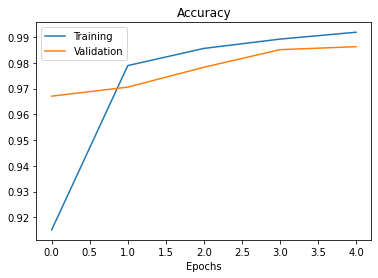

In [ ]:
## Visualising Training and Validation Accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')